<a href="https://colab.research.google.com/github/nisargshah1999/DigestPath2019/blob/master/epic_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas.util.testing as tm
import seaborn as sns
import os
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!wget https://raw.githubusercontent.com/epic-kitchens/annotations/master/EPIC_train_action_labels.csv

--2020-06-19 09:20:18--  https://raw.githubusercontent.com/epic-kitchens/annotations/master/EPIC_train_action_labels.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2973977 (2.8M) [text/plain]
Saving to: ‘EPIC_train_action_labels.csv’

EPIC_train_action_l 100%[===================>]   2.84M  11.1MB/s    in 0.3s    

2020-06-19 09:20:18 (11.1 MB/s) - ‘EPIC_train_action_labels.csv’ saved [2973977/2973977]



In [2]:
a=pd.read_csv('EPIC_train_action_labels.csv')

FileNotFoundError: ignored

In [ ]:
a

,uid,participant_id,video_id,narration,start_timestamp,stop_timestamp,start_frame,stop_frame,verb,verb_class,noun,noun_class,all_nouns,all_noun_classes
0,0,P01,P01_01,open door,00:00:00.14,00:00:03.37,8,202,open,2,door,8,['door'],[8]
1,1,P01,P01_01,turn on light,00:00:04.37,00:00:06.17,262,370,turn-on,12,light,113,['light'],[113]
2,2,P01,P01_01,close door,00:00:06.98,00:00:09.49,418,569,close,3,door,8,['door'],[8]
3,3,P01,P01_01,open fridge,00:00:12.77,00:00:13.99,766,839,open,2,fridge,10,['fridge'],[10]
4,4,P01,P01_01,take celery,00:00:15.25,00:00:16.40,915,983,take,0,celery,185,['celery'],[185]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28467,39232,P31,P31_14,wash glass,00:03:53.19,00:04:17.71,13991,15462,wash,4,glass,16,['glass'],[16]
28468,39233,P31,P31_14,dry hands,00:04:51.21,00:04:58.93,17472,17935,dry,11,hand,12,['hand'],[12]
28469,39234,P31,P31_14,pick up napkins,00:04:59.53,00:05:02.24,17971,18134,pick-up,0,napkin,97,['napkin'],[97]
28470,39235,P31,P31_14,put down napkins,00:05:02.34,00:05:10.76,18140,18645,put-down,1,napkin,97,['napkin'],[97]


In [ ]:
from collections import Counter
dict_action = {}
x = a['narration'].values
for i in x: dict_action[i]=0
for i in x: dict_action[i]=dict_action[i]+1
ct = Counter(dict_action)
count = 0
for k,v in ct.most_common():
  if v>50: count+=1
print(count)


56


['open' 'turn-on' 'close' ... 'pick-up' 'put-down' 'close']
28472 ['open', 'turn-on', 'close', 'open', 'take', 'take', 'take', 'close', 'open', 'take', 'open', 'close', 'put-down', 'open', 'take', 'put-down', 'close', 'open', 'take', 'take', 'put-down', 'close', 'put-down', 'open', 'wash', 'wash', 'wash', 'wash', 'close', 'put-down', 'open', 'take', 'take', 'put-down', 'close', 'close', 'take', 'cut', 'turn-on', 'cut', 'cut', 'dice', 'dice', 'dice', 'dice', 'pour', 'throw', 'open', 'close', 'take', 'stir', 'take', 'open', 'pour', 'put-down', 'stir', 'put-down', 'take', 'wash', 'open', 'wash', 'close', 'put-down', 'cut', 'cut', 'pour', 'put-down', 'take', 'throw', 'open', 'put', 'close', 'take', 'stir', 'put-down', 'open', 'take', 'take', 'put-down', 'close', 'take', 'take', 'cut', 'cut', 'cut', 'put-down', 'take', 'open', 'pour', 'pour', 'close', 'turn', 'take', 'stir', 'stir', 'take', 'take', 'open', 'put', 'close', 'take', 'open', 'put', 'take', 'put', 'open', 'put', 'close', 'put', 

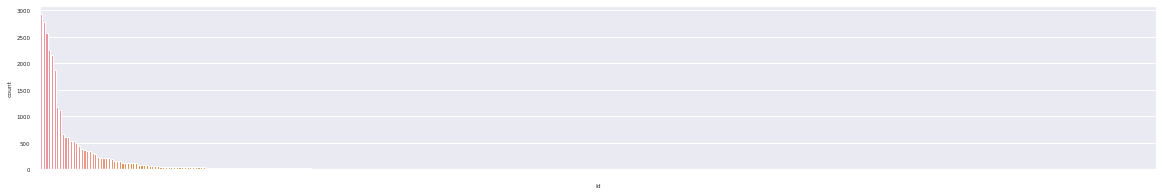

In [ ]:
a=pd.read_csv('EPIC_train_action_labels.csv')
f = a['verb']
print(f.values)
fin = [i for i in f]
print(len(fin),fin)
dic = {}
for i in range(len(fin)): dic[fin[i]]=0
for i in range(len(fin)): dic[fin[i]] = dic[fin[i]] +1
print(len(dic))
#print(dic['open door'])

pd3 = pd.DataFrame(data=fin,columns=["Id"])
import matplotlib.pyplot as plt
sns.set(font_scale=0.5)
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
final = sns.countplot(x="Id", data=pd3,ax=ax,order = pd3['Id'].value_counts().index)
final.set(xticklabels=[])
plt.savefig('noun_epickitchen.pdf',bbox_inches='tight')

In [3]:
!wget https://raw.githubusercontent.com/fpv-iplab/rulstm/master/RULSTM/data/actions.csv
!wget https://raw.githubusercontent.com/fpv-iplab/rulstm/master/RULSTM/data/training.csv
!wget https://raw.githubusercontent.com/fpv-iplab/rulstm/master/RULSTM/data/validation.csv

--2020-06-21 19:47:38--  https://raw.githubusercontent.com/fpv-iplab/rulstm/master/RULSTM/data/actions.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63127 (62K) [text/plain]
Saving to: ‘actions.csv’

actions.csv         100%[===================>]  61.65K  --.-KB/s    in 0.02s   

2020-06-21 19:47:38 (2.44 MB/s) - ‘actions.csv’ saved [63127/63127]

--2020-06-21 19:47:43--  https://raw.githubusercontent.com/fpv-iplab/rulstm/master/RULSTM/data/training.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1268622 (1.2M) [text/plain]
Saving

In [4]:
act = pd.read_csv('training.csv',header=None)
link = pd.read_csv('actions.csv')
act_val = pd.read_csv('validation.csv',header=None)

In [5]:
act_val

,0,1,2,3,4,5,6
0,0,P01_01,4,101,2,8,1298
1,1,P01_01,131,185,12,113,434
2,2,P01_01,209,284,3,8,1564
3,3,P01_01,383,419,2,10,1189
4,4,P01_01,457,491,0,185,81
...,...,...,...,...,...,...,...
4974,39011,P31_08,24682,24724,2,8,1298
4975,39012,P31_08,24766,24804,2,8,1298
4976,39013,P31_08,24807,24873,0,17,68
4977,39014,P31_08,24920,24965,2,8,1298


2291
85
<bound method Counter.most_common of Counter({1298: 506, 1305: 378, 859: 344, 194: 336, 1564: 309, 225: 304, 1189: 303, 892: 272, 1253: 270, 1690: 264, 205: 259, 870: 251, 1761: 230, 1494: 225, 666: 215, 1569: 213, 1541: 212, 553: 204, 1676: 201, 445: 195, 1767: 190, 0: 184, 881: 176, 388: 167, 677: 167, 1784: 163, 723: 160, 214: 152, 1935: 152, 117: 141, 59: 138, 2125: 138, 783: 129, 1792: 127, 105: 123, 750: 122, 741: 122, 75: 118, 2221: 118, 1755: 116, 11: 116, 1774: 111, 1731: 109, 1737: 104, 85: 101, 1726: 97, 837: 97, 172: 95, 2077: 89, 769: 88, 112: 85, 842: 83, 777: 78, 819: 77, 97: 76, 31: 76, 715: 75, 2124: 75, 1711: 73, 1721: 71, 858: 69, 193: 69, 826: 66, 124: 66, 695: 66, 52: 65, 1069: 65, 167: 64, 790: 63, 762: 62, 451: 62, 565: 62, 1753: 61, 1012: 59, 1245: 58, 2088: 56, 1970: 55, 1295: 55, 160: 54, 1265: 54, 572: 54, 478: 53, 1966: 53, 833: 51, 1976: 51, 152: 50, 2233: 50, 164: 50, 1538: 49, 1196: 49, 2118: 48, 862: 47, 358: 47, 226: 46, 1707: 45, 1237: 44, 146:

'\npd1 = pd.DataFrame(d.items(), columns=[\'Action\', \'frequency\'])\nprint(pd1)\nfinal2 = sns.lineplot(x="Action", y="frequency", data=pd1)\n'

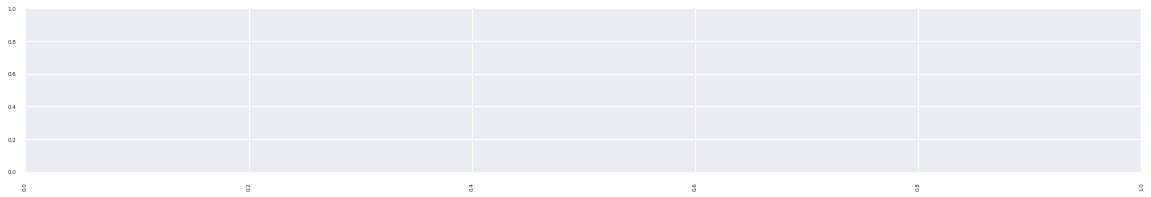

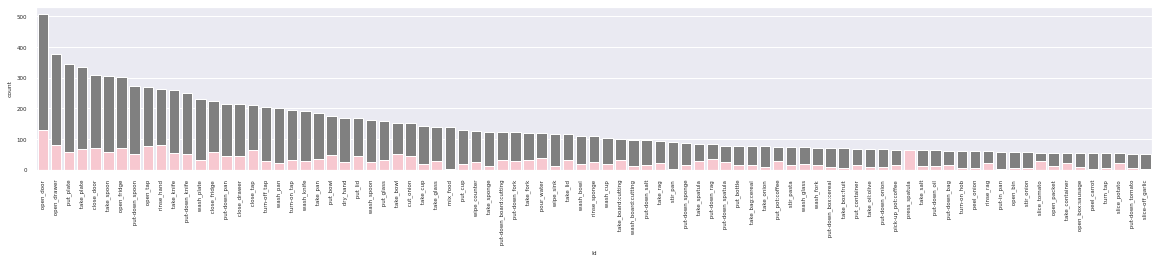

In [10]:

from collections import Counter
dict_action = {}
x = act[6].values
for i in x: dict_action[i]=0
for i in x: dict_action[i]=dict_action[i]+1
ct = Counter(dict_action)
print(len(dict_action))
count = 0
instu = 99999
instl = 50
plt = []
for k,v in ct.most_common(): 
  if (v>instl and v<=instu): 
    for j in range(v): 
      plt.append(link['action'][k])
## Frequency dictionary with limit -- inst
d= {}
for k,v in ct.most_common(): 
  if (v>instl and v<=instu): 
    d[link['action'][k]] = v

#print(plt)
dic = {}
fin = plt
for i in range(len(fin)): dic[fin[i]]=0
for i in range(len(fin)): dic[fin[i]] = dic[fin[i]] +1
print(len(dic))
#print(dic['open door'])

pd3 = pd.DataFrame(data=fin,columns=["Id"])
import matplotlib.pyplot as plt
sns.set(font_scale=0.5)
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)


## Validation Data

x = act_val[6].values
for i in x: dict_action[i]=0
for i in x: dict_action[i]=dict_action[i]+1
#ct = Counter(dict_action)
print(ct.most_common)
count = 0
plt = []

for k,v in ct.most_common(): 
  if (v>instl and v<=instu): 
    #print(dict_action[k],link['action'][k])
    for j in range(dict_action[k]): 
      plt.append(link['action'][k])

## Frequency dictionary with limit -- inst
d= {}
for k,v in ct.most_common(): 
  if (v>instl and v<=instu): 
    d[link['action'][k]] = dict_action[k]
print(d)
#print(plt)
dic = {}
fin = plt
for i in range(len(fin)): dic[fin[i]]=0
for i in range(len(fin)): dic[fin[i]] = dic[fin[i]] +1
print(len(dic))
#print(dic['open door'])

pd4 = pd.DataFrame(data=fin,columns=["Id"])
import matplotlib.pyplot as plt
sns.set(font_scale=0.5)
fig_dims = (20, 3)
fig, ax = plt.subplots(figsize=fig_dims)
plt.xticks(rotation=90)
final = sns.countplot(x="Id", data=pd4,ax=ax,order = pd4['Id'].value_counts().index)


##plotting
final = sns.countplot(x="Id", data=pd3,ax=ax,order = pd3['Id'].value_counts().index,color='grey')
#final2 = final.twinx()
#final2 = final.twiny()
final2 = sns.countplot(x="Id", data=pd4,ax=ax,color='pink')
plt.savefig('mix_action_epickitchen_10inst.pdf',bbox_inches='tight')


'''
pd1 = pd.DataFrame(d.items(), columns=['Action', 'frequency'])
print(pd1)
final2 = sns.lineplot(x="Action", y="frequency", data=pd1)
'''

In [ ]:
import os
print( os.getcwd() )


/content


In [ ]:
print(os.listdir())

['.config', 'noun_epickitchen.pdf', 'gdrive', 'training.csv', 'actions.csv.1', 'action_epickitchen.pdf', 'actions.csv', 'EPIC_train_action_labels.csv', 'sample_data']


In [ ]:
from google.colab import files
files.download( "mix_action_epickitchen_10inst.pdf" ) 


In [ ]:
fmri = sns.load_dataset("fmri")
print(fmri)

     subject  timepoint event    region    signal
0        s13         18  stim  parietal -0.017552
1         s5         14  stim  parietal -0.080883
2        s12         18  stim  parietal -0.081033
3        s11         18  stim  parietal -0.046134
4        s10         18  stim  parietal -0.037970
...      ...        ...   ...       ...       ...
1059      s0          8   cue   frontal  0.018165
1060     s13          7   cue   frontal -0.029130
1061     s12          7   cue   frontal -0.004939
1062     s11          7   cue   frontal -0.025367
1063      s0          0   cue  parietal -0.006899

[1064 rows x 5 columns]
